# The casino roulette wheel and its distributions
## Understanding Gaussian and Binomial distributions. 
## Tutorial using the `gbjl-probability` Python package.
**Author:** Jorge Nustes Andrade

Spinning a casino roulette wheel is a clear example of an experiment that generates aleatory events. The sample space of an American roulette are the possible numbers that the ball could land in (i.e., 38 {0,1,2,3,...,36,0,00}). The probability of winning $x$ times at $n$ consecutive trials when playing the roulette can be modeled using a **Binomial Distribution**. In this case, we assume that only two outcomes are possible; you either win or lose. This is generally true if you put all your bets on a single number of the roulette at every spin. Keep in mind that each spin is independent from the previous one, meaning that getting a particular number on the present trial will not determine the outcome of the next trial. The mean of a Binomial distribution is expressed assume
$$
\mu=np,
$$
where $p$ is the probabiblity of success of an individual trial. In the American roulette $p=1/38\approx0.026$. The luck factor is calculated using the standard deviation $\sigma$. The latter is defined as 
$$
\sigma=\sqrt{np(1-p)},
$$
where the term in parenthesus equals the probability of losing. The probability density function (PDF) of winning $x$ times during $n$ consecutive spins of the roulette is
$$
P=\left(\frac{n!}{x!(n-x)!}\right)(p)^{x}(1-p)^{n-x}.
$$
Let's model the probability of winning at the roulette using a Binomial distribution. 

First, install the `gbjl-probability` use `pip install gbjl-probability` on terminal. Next import the required libraries.

In [2]:
import math
import random
import plotly.io as pio
pio.renderers.default = "svg"
import plotly.graph_objects as go
from gbjl_probability import Gaussian, Binomial

Create a Binomial object with a probability of success of $p=1/38$ and $n=20$ plays of the roulette.

In [3]:
binomial = Binomial(1/38, 20)

The distribution of outcomes can be inspected by calling the `plot_bar()` attribute of the `binomial` object. 

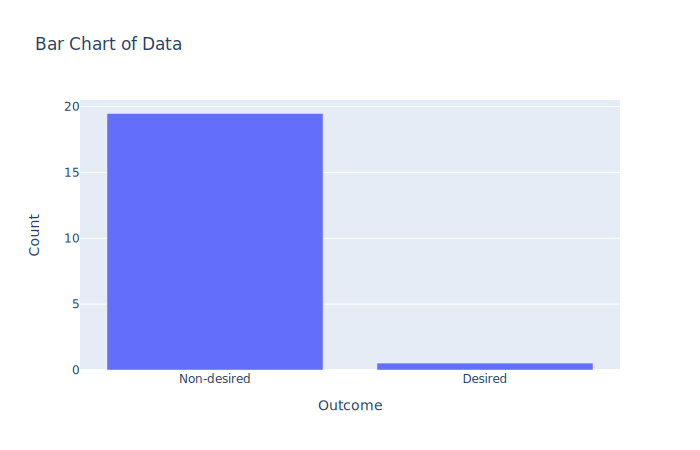

In [4]:
binomial.plot_bar()

The PDF can be computed using the `plot_bar_pdf` function

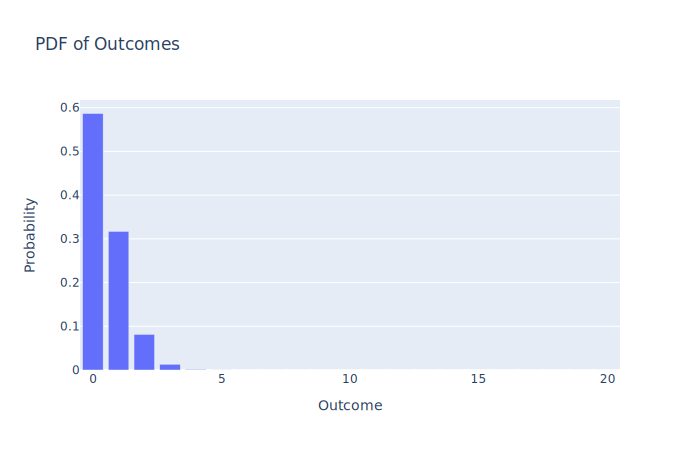

In [5]:
x, p = binomial.plot_bar_pdf()

In [6]:
print('Which means that the probability of loosing in all 20 spins is {:.3}, winning at least 1 time is {:.3}, and winning 3 times is {:.3}'.format(p[0], p[1], p[3]))

Which means that the probability of loosing in all 20 spins is 0.587, winning at least 1 time is 0.317, and winning 3 times is 0.0132


Now, imagine we do $n=1000$ spins. This is enough to assume a normal or **Gaussian Dristribution** of the outcomes. The Gaussian distribution is a continuous function which approximates the exact binomial distribution of events. The mean of a Gaussian distrinution is 
$$
\mu=\frac{1}{n}\sum_{i=1}^{n}x_{i}.
$$
The standard deviation varies if only a sample or the entire population is used. For the entire population, the standard deviation is
$$
\sigma=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\mu)^2},
$$
while for a sample subset is 
$$
\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\mu)^2}.
$$
The PDF of a Gaussian distributed is computed as
$$
P=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

In [7]:
# First I generated 1000 random trials of the roulette number 0 is 37 and 00 is 38. The data is saved into a .txt file.
output_file = open('test.txt', 'w')
for i in range(1000):
    line = str(random.randint(1, 38))
    output_file.write(str(line) + '\n')

output_file.close()

Create the Gaussian object

In [8]:
gaussian = Gaussian()

The `gaussian` object contains a function `read_data_file` that allows reading a tect file containing the events. Each row has to be an independent event. 

In [9]:
gaussian.read_data_file('test.txt')


Now, let's see the frequency of the outcomes using the `plot_histogram()` function.

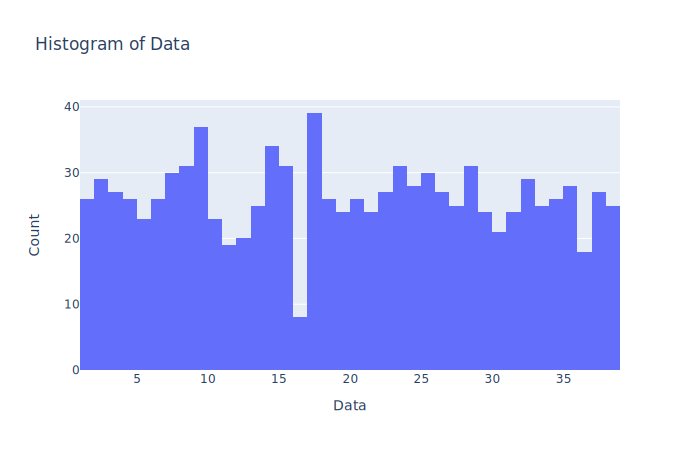

In [10]:
gaussian.plot_histogram()

The PDF and normalized histogram is computed using the `plot_histogram_pdf()` function

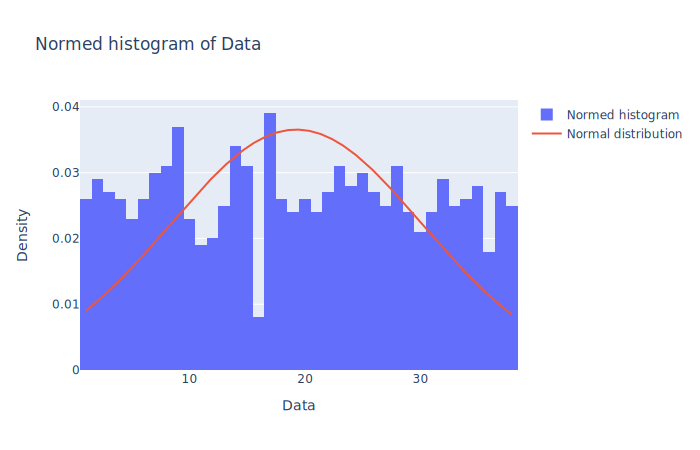

In [11]:
xg, pg = gaussian.plot_histogram_pdf()

In [12]:
n = 1000
mean = n * 1/38
std = math.sqrt(n * 1/38 * (1 - 1/38))
print('The average wins at the reulette are {}, and the standard deviation is {:.3}'.format(int(mean), std))

The average wins at the reulette are 26, and the standard deviation is 5.06


In [13]:
print('The probability of winning at the roulette between {} and {} times in {} spins is {:.3}% \nif you only pick 1 number out of 68 at every spin.'.format(int(mean - std), int(mean + std), n, 34.13 * 2))

The probability of winning at the roulette between 21 and 31 times in 1000 spins is 68.3% 
if you only pick 1 number out of 68 at every spin.


In [14]:
print('The probability of winning at the roulette between {} and {} times in {} spins is {:.3}% \nif you only pick 1 number out of 68 at every spin.'.format(int(mean + std), int(2* (mean + std)), n, 13.6))

The probability of winning at the roulette between 31 and 62 times in 1000 spins is 13.6% 
if you only pick 1 number out of 68 at every spin.


In [49]:
print('The probability of winning at the roulette between {} and {} times in {} spins is {:.3}% \nif you only pick 1 number out of 68 at every spin.'.format(int(2* (mean + std)), int(3* (mean + std)), n, 2.1))

The probability of winning at the roulette between 62 and 94 times in 1000 spins is 2.1% 
if you only pick 1 number out of 68 at every spin.
